# Gaussian Mixture Models and Expectation Maximization

#### Notebook Content

<ol>
    <li>Mixture Models</li>
    <li>Gaussian Mixture Models</li>
    <li>Maximum Likelihood for Gaussian Mixture Models</li>
    <li>Expectation-Maximization for Gaussian Mixture Models</li>
    <li>Example</li>
    <li>Current Research</li>
</ol>


## 1. Mixture Model

A mixture model can be defined as a probabilistic model that is formulated using a linear combination of probability distributions. Some examples are Bernoulli Mixture Models, Gaussian Mixture Models etc. 

## 2. Gaussian Mixture Model (GMM)

It is a linear combination of gaussian distributions. Formally defined as a superposition of K gaussian densities. Also known as mixture of gaussians. Every individual gaussian density is known as a component of this mixture.

$$
\begin{align}
p(x) &= \prod_{n=1}^{N}\mathcal{N}(x \mid \mu, \Sigma)\\
p(x) &= \prod_{n=1}^{N}\sum_{k=1}^{K}\pi_k\mathcal{N}(x \mid \mu_k, \Sigma_k) \tag{1}
\end{align}
$$

$\boxed{\pi_k}$ - Mixing coefficient of kth gaussian component. Prior probability of picking the kth component.

Integrating both sides of equation 1, $\int p(x)dx = \sum_{k=1}^{K}\pi_k \int \mathcal{N}(x \mid \mu_k, \Sigma_k)dx \Rightarrow \boxed{\sum_{k=1}^{K}\pi_k = 1}$

Moreover, $p(x) \geq 0$ and $\mathcal{N}(x \mid \mu_k, \Sigma_k) \geq 0 \Rightarrow \boxed{0 \leq \pi_k \leq 1}$

Therefore, $\pi_k = p(k)$, where k denotes the kth component.

$\boxed{\mu_k, \Sigma_k}$ - Mean and Covariance of kth gaussian component.


The log probability of the distribution of x can be given as follows:

$$
\begin{align}
&p(x) = \prod_{n=1}^{N}\sum_{k=1}^{K}\pi_k\mathcal{N}(x \mid \mu_k, \Sigma_k)\\
\Rightarrow \, &\log p(x) = \sum_{n=1}^{N} \log \left(\sum_{k=1}^{K}\pi_k\mathcal{N}(x \mid \mu_k, \Sigma_k) \right) \tag{2}
\end{align}
$$

### 2.1 Why GMM?

#### 1. Modelling Complex Continuous Densities

<img src="Output Pictures/gaussianmixture.png" width="500" height="400">

Multimodal data containing multiple peaks/clumps. A single gaussian distribution cannot capture this structure.

<img src="Output Pictures/gaussianmixturecomps.png" width="500" height="400">

#### 2. Learns the components automatically. (by learning the parameters)

Estimates $\mu_k, \Sigma_k$ and $\pi_k$ automatically for all K components. 

#### 3. Clustering - soft assignments, probability of datapoint belonging to a class. 

<img src="Output Pictures/assignments.png" width="400" height="300">

### 2.2 Latent Variables

Latent variables are variables that are not observed but inferred. 

Consider and introduce a K-dimensional binary latent variable $z$ represented using 1-of-K representations. 

<img src="Output Pictures/zgivenx.png" width="100" height="100">

$$
\begin{align}
&\sum_{k \in K}z_k = 1\\
&z_k \in \{0,1\}\\
&z = \begin{bmatrix}
0 & 1 & 0
\end{bmatrix}
\end{align}
$$

We can represent the marginal $p(z)$ and conditional $p(x|z)$ as follows:

$$
\begin{align}
&p(z) = \prod_{k=1}^{K}\pi_k^{z_k} \Rightarrow p(z_k = 1) = \pi_k\\
&p(x|z) = \prod_{k=1}^{K}\mathcal{N}(x \mid \mu_k,\Sigma_k)^{z_k} \Rightarrow p(x|z_k = 1) = \mathcal{N}(x \mid \mu_k, \Sigma_k)\\
&p(x) = \sum_{z}p(z,x) = \sum_{z}p(z)p(x|z) = \sum_{k=1}^{K}\pi_k\mathcal{N}(x \mid \mu_k, \Sigma_k) \tag{3}
\end{align}
$$

For every datapoint $x_n$, we have a $z_n$.

Therefore, we have represented equation 3 in the same way as equation 1, but this time with a latent variable in play. As we already have the prior probability $p(z_k=1) = \pi_k$, we can represent the posterior probability $p(z_k=1 \mid x)$ as $\gamma(z_k)$, which can be derived as follows:

$$
p(z_k=1 \mid x) = \gamma(z_k) = \frac{p(z_k = 1, x)}{p(x)} = \frac{p(x \mid z_k = 1)p(z_k=1)}{p(x)} = \boxed{\frac{\pi_k\mathcal{N}(x \mid \mu_k, \Sigma_k)}{\sum_{k'=1}^{K}\pi_{k'}\mathcal{N}(x \mid \mu_{k'}, \Sigma_{k'})}} \tag{4}
$$

$\gamma(z_k)$ is the responsibility that component k takes for explaining the observation x. 

### 3 Maximum Likelihood

There are several challenges and problems with using Maximum Likelihood for Gaussian Mixture Models.

#### 3.1 Singularities

This is a problem where a gaussian component collapses onto a single datapoint. Consider $\mu_k = x_n$, this will contribute as one term in the likelihood as follows:

$$
\mathcal{N}(x_n \mid x_n, \sigma_{k}^2I) = \frac{1}{2\pi^{\frac{1}{2}}}\frac{1}{\sigma_k}
$$

<img src="Output Pictures/singularity.png" width="300" height="200">

Can be avoided using simple heuristics, such as resetting mean to random values and resetting covariance to large value when component is collapsing. 

$$
\begin{align}
\mathcal{N}(x_n \mid x_n, \sigma_{j}^2I) &= \frac{1}{\sqrt{2\pi\sigma_{j}^{2}}}exp\left(\frac{-\frac{1}{2}(x_n - \mu_j)^2}{\sigma_{j}^2}\right)\\
&= \frac{1}{\sqrt{2\pi}\sigma_{j}}exp\left(0\right)\\
&= \boxed{\frac{1}{\sqrt{2\pi}\sigma_{j}}}
\end{align}
$$

$$
\begin{align}
\sigma_j \rightarrow 0 \Rightarrow \mathcal{N}(x_n \mid \mu_j, \Sigma_j) \rightarrow \infty \Rightarrow p(x_n \mid \mu, \pi, \Sigma) \rightarrow \infty
\end{align}
$$

#### 3.2 Identifiability

Identifiability is a problem when we try to figure out the parameter values that a model has acquired. 

$K$-component mixture $\Rightarrow$ $K!$ solutions $\Rightarrow$ $K!$ ways of assigning $K$ sets of parameters to $K$ components. 

For any point in the parameter space that is nondegenerate, there are further $K!-1$ points that result in the same distribution

#### 3.3 Summation under Log

In equation 2, given below, we can see that the summation term is under the log and no longer acts directly on the gaussian. Setting it's derivative to 0, resulting in complicated expressions, as the log is not able to remove the exponential function, and we do not obtain a closed from solution. 

$$\log p(x) = \sum_{n=1}^{N} \log \left(\sum_{k=1}^{K}\pi_k\mathcal{N}(x \mid \mu_k, \Sigma_k) \right)$$

Setting the derivative of the above equation w.r.t $\mu_k$ to 0, we get the following:

$$
\begin{align}
\frac{\partial \log p(x)}{\partial \mu_k} = \sum_{n=1}^{N} \frac{\pi_k \mathcal{N}(x_n \mid \mu_k, \Sigma_k)}{\sum_{k=1}^K \pi_k \mathcal{N}(x_n \mid \mu_k, \Sigma_k)}\cdot \Sigma_{k}^{-1}(x_n - \mu_k) = 0
\end{align}
$$

Looking at the above equation, we can clearly see that we can't obtain a closed form solution for $\mu_k$ as we do not have information about the value of the latent variables. If we knew the information about the latent variables, we would know what data points belong to which component and hence, it would be simple to estimate $\mu_k$ as:

$$
\mu_k = \frac{\sum_{x_n \in k}x_n}{N_k}
$$

### 4 Expectation-Maximization for GMM

<strong>Goal</strong> - Find maximum likelihood solutions for models with latent variables, that is, maximize the likelihood function $p(X \mid \theta)$ w.r.t $\theta$.

Let $X$ be a set of all observed data and $Z$ be the set of latent variables with model parameters denoted as $\theta$. Therefore, the marginal is given by:

$$
\begin{align}
&p(X\mid\theta) = \sum_{Z}p(X,Z\mid\theta)\\
&\Rightarrow \log p(X\mid\theta) = \log \left(\sum_{Z}p(X,Z\mid\theta)\right)
\end{align}
$$

Key observation - The summation term appears inside the logarithm and results in complicated expressions for maximum likelihood solutions. Therefore, even if the joint belongs to the exponential family, the marginal will not belong to the exponential family due to the presence of the summation. X is given, Z is not given, but our goal is to maximize the likelihood for the complete dataset that includes the latent variable too. 

$$
\begin{align}
&\{X,Z\} \Rightarrow \text{Complete Data}\\
&\{X\} \Rightarrow \text{Incomplete Data}\\
&\theta^{old} \Rightarrow \text{Current Parameter Values}
\end{align}
$$

Z is unknown, so how do we proceed? The only way to evaluate the values of the latent variable Z is to have a look at the posterior distribution of Z $p(Z\mid X, \theta)$. As we can see above, we cannot use the complete data log likelihood as Z is not observed.

We start by initializing $\theta^{old}$ with some values.

<strong>1. E step</strong>:


Z is unknown, so how do we proceed? The only way to evaluate the values of the latent variable Z is to have a 
look at the posterior distribution. We cannot use the complete data log likelihood as Z is not observed!

Using current parameter values $\theta^{old}$, we estimate the posterior distribution $p(Z\mid X, \theta)$ (responsibilities $\gamma(z_{nk})$, as defined in the previous slides. We then use the posterior distribution $p(Z\mid X, \theta^{old})$ (responsibilities, $\gamma(z_{nk})$) to compute the expected value of the complete-data log likelihood. We can denote the expected value with $\mathcal{Q}(\theta, \theta^{old})$, where $\theta$ is some general parameter value. For all data points $x_n$:

$$
\begin{align}
&\gamma(z_{nk}) = \frac{p(z_{nk} = 1, x_n)}{p(x_n)} = \frac{p(x_n \mid z_{nk} = 1)p(z_{nk}=1)}{p(x_n)} = \frac{\pi_k\mathcal{N}(x_n \mid \mu_k, \Sigma_k)}{\sum_{k'=1}^{K}\pi_{k'}\mathcal{N}(x_n \mid \mu_{k'}, \Sigma_{k'})} \tag{5}\\[10pt]
&\mathcal{Q}(\theta,\theta^{old}) = E_{Z}[\log p(X,Z \mid \theta)] = \sum_{Z}p(Z\mid X,\theta^{old})\log p(X,Z \mid \theta)
\end{align}
$$

$\mathcal{Q}(\theta,\theta^{old})$ can also be given as follows:

$$
\begin{align}
&\Rightarrow p(X,Z \mid \mu, \Sigma, \pi) = p(X\mid Z,\mu, \Sigma, \pi)p(Z \mid \mu, \Sigma, \pi)\\
&\Rightarrow p(X,Z \mid \mu, \Sigma, \pi) = \prod_{n=1}^{N}\prod_{k=1}^{K}\pi_{k}^{z_{nk}}\mathcal{N}(x_n \mid \mu_k, \Sigma_k)^{z_{nk}}\\
&\Rightarrow\log p(X,Z \mid \mu, \Sigma, \pi) = \sum_{n=1}^{N}\sum_{k=1}^{K}z_{nk}\left(\log\pi_k + \log\mathcal{N}(x_n \mid \mu_k, \Sigma_k)\right)\\
&\Rightarrow E_{Z\mid X}[\log p(X,Z \mid \mu, \Sigma, \pi)] = \sum_{n=1}^{N}\sum_{k=1}^{K}E_{Z\mid X}[z_{nk}]\left(\log\pi_k + \log\mathcal{N}(x_n \mid \mu_k, \Sigma_k)\right) 
\end{align}
$$

The expected value of $z_{nk}$ can be given as follows:

$$
\begin{align}
&E_{Z \mid X}[z_{nk}] = \frac{\sum_{z_{nk}}z_{nk}[\pi_k\mathcal{N}(x_n \mid \mu_k, \Sigma_k)]^{z_{nk}}}{\sum_{z_{ni}}[\pi_k\mathcal{N}(x_n \mid \mu_i, \Sigma_i)]^{z_{ni}}} = \frac{\pi_k \mathcal{N}(x_n \mid \mu_k, \Sigma_k)}{\sum_{i=1}^{K}\pi_i\mathcal{N}(x_n \mid \mu_i, \Sigma_i)} = \gamma(z_{nk})
\end{align}
$$

Therefore,

$$
\begin{align}
\boxed{\mathcal{Q}(\theta,\theta^{old}) = \sum_{n=1}^{N}\sum_{k=1}^{K}\gamma(z_{nk})\left(\log\pi_k + \log\mathcal{N}(x_n \mid \mu_k, \Sigma_k)\right)} 
\end{align}
$$

<strong>2. M step</strong>:

The goal is to maximize this expected value $\mathcal{Q}(\theta,\theta^{old})$ w.r.t to $\theta$ to obtain the new model parameters, given by $\theta^{new}$. The set of new model parameters for a single component is $\{\mu_k^{new},\Sigma_k^{new}, \pi_k^{new}\}$. 

To find $\pi_k^{new}$:

$$
\begin{align}
&f(\pi_k) = \mathcal{Q}(\theta,\theta^{old}) = \sum_{n=1}^{N}\sum_{k=1}^{K}\gamma(z_{nk})\left(\log\pi_k + \log\mathcal{N}(x_n \mid \mu_k, \Sigma_k)\right)\\
&g(\pi_k) = \sum_{k=1}^{K}\pi_k - 1 \tag{Equality Constraint}\\
&\mathcal{L}(\pi_k, \lambda) = f(\pi_k) + \lambda g(\pi_k)
\end{align}
$$

Taking derivative w.r.t $\pi_k$:

$$
\begin{align}
&\frac{\partial \mathcal{L}(\pi_k, \lambda)}{\partial \pi_k} = \sum_{n=1}^{N}\frac{\gamma(z_{nk})}{\pi_k} + \lambda = 0\\
\end{align} 
$$

We also know the values of $\gamma(z_{nk})$ from equation 5, therefore, we can see that:

$$
\begin{align}
&\sum_{n=1}^{N}\frac{\gamma(z_{nk})}{\pi_k} + \lambda = 0\\
\Rightarrow & \pi_k = \frac{\sum_{n=1}^{N}\gamma(z_{nk})}{-\lambda} \tag{6}
\end{align} 
$$

Taking the derivative of $\mathcal{L}(\pi_k, \lambda)$ w.r.t $\lambda$, we get:

$$
\begin{align}
&\frac{\partial \mathcal{L}(\pi_k, \lambda)}{\partial \lambda} = \sum_{k=1}^{K}\pi_k - 1 \Rightarrow \sum_{k=1}^{K}\pi_k = 1\\
&-\sum_{k=1}^{K}\left(\frac{\sum_{n=1}^{N}\gamma(z_{nk})}{\lambda}\right) = 1 \tag{Substituting $\pi_k$ from 6} \Rightarrow \lambda = -\sum_{k=1}^{K}\sum_{n=1}^{N}\gamma(z_{nk})
\end{align}
$$

Substituting $\lambda$ in 6:

$$
\begin{align}
&\pi_k^{new} = \frac{\sum_{n=1}^{N}\gamma(z_{nk})}{\sum_{k=1}^{K}\sum_{n=1}^{N}\gamma(z_{nk})}\\[5pt]
&= \frac{N_k}{\sum_{K}N_k} = \boxed{\frac{N_k}{N}}\\[5pt]
\end{align}
$$ 

where $N_k = \sum_{n=1}^{N}\gamma(z_{nk})$ and $N = \sum_{k=1}^{K}N_k$.

Similarly,

$$
\begin{align}
&\boxed{\mu_{k}^{new} = \frac{1}{N_k}\sum_{n=1}^{N}\gamma(z_{nk})x_n}\\
&\boxed{\Sigma_{k}^{new} = \frac{1}{N_k}\sum_{n=1}^{N}\gamma(z_{nk})(x_n - \mu_{k}^{new})(x_n - \mu_{k}^{new})^T}\\
&\boxed{\pi_{k}^{new} = \frac{N_k}{N}}
\end{align}
$$

<strong>3. Evaluating Log Likelihood</strong>

After every M step, we check for convergence and see if the convergence criterion is satisfied. 

$\log p(X \mid \mu, \Sigma, \pi) = \sum_{n=1}^{N} \log \left(\sum_{k=1}^{K}\pi_k\mathcal{N}(x \mid \mu_k, \Sigma_k) \right)$

### 5 Example

Let us understand this with the help of an example provided below.
<img src="Output Pictures/intro.png" width="500" height="600">



[]

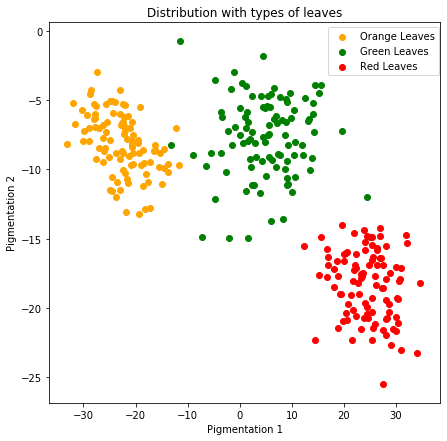

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.datasets import make_spd_matrix
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.stats import multivariate_normal as multivar_norm
from scipy.stats import lognorm
from matplotlib.colors import LogNorm
from IPython.display import Video
from IPython.display import HTML
from IPython.display import Image

np.random.seed(7)
x = np.random.randn(50,2)
#u_1 = np.array([-1.3,-1.3])
#u_2 = [-2, 2]
#u_3 = [2,0]
#var_1 = make_spd_matrix(2) 
#var_2 = make_spd_matrix(2)
#var_3 = make_spd_matrix(2)
u_1 = [-23.3,-8]
u_2 = [5, -7]
u_3 = [25,-18]
var_1 = make_spd_matrix(2) * 10
var_2 = make_spd_matrix(2) * 15
var_3 = make_spd_matrix(2) * 10
dist1x, dist1y = np.random.multivariate_normal(u_1, var_1, 100).T
dist2x, dist2y = np.random.multivariate_normal(u_2, var_2, 100).T
dist3x, dist3y = np.random.multivariate_normal(u_3, var_3, 100).T
dist1 = np.array([dist1x,dist1y]).T
dist2 = np.array([dist2x,dist2y]).T
dist3 = np.array([dist3x,dist3y]).T
data = np.vstack([dist1, dist2, dist3])

# Distribution Plotted
np.random.seed(7)
np.random.RandomState(7)
fig = plt.figure(figsize=(7,7))
plt.title('Distribution with types of leaves')
plt.scatter(dist1x, dist1y, color='orange', label='Orange Leaves')
plt.scatter(dist2x, dist2y, color='green', label='Green Leaves')
plt.scatter(dist3x, dist3y, color='red', label='Red Leaves')
plt.xlabel('Pigmentation 1')
plt.ylabel('Pigmentation 2')
plt.savefig('leaf_dist_with_colors')
plt.legend(loc='best', bbox_to_anchor=(1.01, 1))
plt.plot()

#### 2.5.1 DATA DESCRIPTION
3 Clusters - Red, Green and Orange

2 attributes - Pigmentation 1, Pigmentation 2
<table>
  <tr>
    <th><img src="Output Pictures/distributed_leaves.png" width="500" height="600"></th>
    <th><img src="Output Pictures/leaf_dist_with_colors.png" width="500" height="600"></th>
  </tr>
</table>


However, seasonally, it is possible to have leaves that have pigmentation values resulting in a mixture of colors, such as Red-Green or Orange-Green leaves. 
<center><img src="Output Pictures/mixture_leaves.png" width="700" height="700"></center>

### K-Means Clustering (Hard Assignments)

<img src="Output Pictures/k_means.png" width="500" height="600">

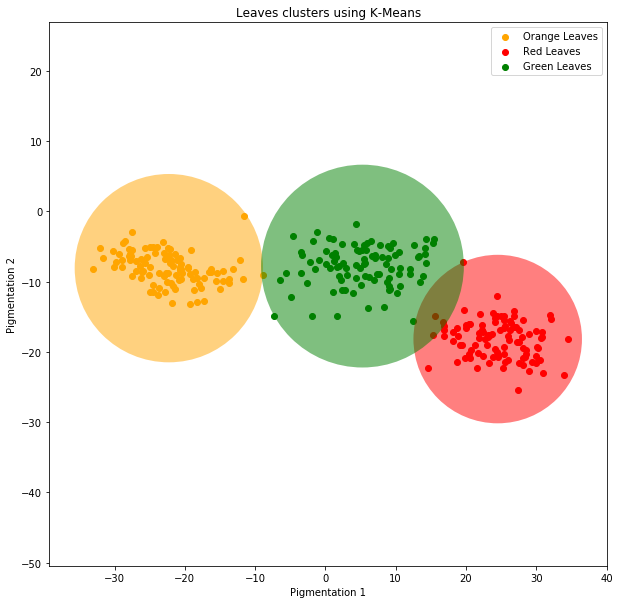

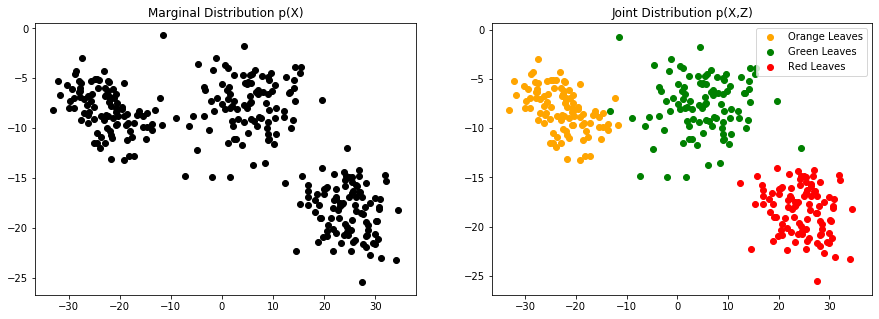

In [2]:
# Using KMeans on this data
def plot_kmeans(kmeans, X, n_clusters=3, rseed=7, ax=None):
    labels = kmeans.fit_predict(X)
    colors = ['orange', 'red', 'green']
    
    # plot the input data
    fig = plt.figure(figsize=(10,10))
    ax = ax or plt.gca()
    ax.axis('equal')
    plt.title('Leaves clusters using K-Means')
    ax.scatter(X[np.where(kmeans.labels_ == 0)][:,0], X[np.where(kmeans.labels_ == 0)][:,1], color='orange', label='Orange Leaves')
    ax.scatter(X[np.where(kmeans.labels_ == 1)][:,0], X[np.where(kmeans.labels_ == 1)][:,1], color='red', label='Red Leaves')
    ax.scatter(X[np.where(kmeans.labels_ == 2)][:,0], X[np.where(kmeans.labels_ == 2)][:,1], color='green', label='Green Leaves')
    
    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    
    cnt = 0
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc=colors[cnt], lw=3, alpha=0.5, zorder=1))
        cnt+=1
    
    plt.xlabel('Pigmentation 1')
    plt.ylabel('Pigmentation 2')
    plt.legend()
    plt.savefig('k_means_clustered_leaves.png')
    plt.plot()
    
    
kmeans = KMeans(n_clusters=3, random_state=27).fit(data)
#print(kmeans.labels_)

plot_kmeans(kmeans, data)

#Complete and incomplete plots
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
plt.title('Marginal Distribution p(X)')
plt.scatter(data[:,0], data[:,1], color='black')
ax2 = fig.add_subplot(1,2,2)
plt.title('Joint Distribution p(X,Z)')
plt.scatter(dist1x, dist1y, color='orange', label='Orange Leaves')
plt.scatter(dist2x, dist2y, color='green', label='Green Leaves')
plt.scatter(dist3x, dist3y, color='red', label='Red Leaves')
plt.legend()
plt.show()

In [3]:
class Gaussian:
    def __init__(self, mu=[0,0], sigma=make_spd_matrix(2), pi=0.33, seed=27):
        self.mu = mu
        self.sigma = sigma
        self.pi = pi
        
    def pdf(self, x):
        return multivar_norm.pdf(x, self.mu, self.sigma, allow_singular=True)
        
class GMM:
    def __init__(self, data, num_gaussians=3, seed=27):
        self.num_gaussians = num_gaussians
        self.gaussians = [Gaussian() for i in range(self.num_gaussians)]
        self.data = data
        self.kmeans = KMeans(n_clusters=self.num_gaussians, random_state=seed).fit(data)
        self.z = np.zeros((self.data.shape[0], self.num_gaussians))
        np.random.seed(seed+1)
        
    def init_params_with_kmeans(self):
        cluster_centers = self.kmeans.cluster_centers_
        cluster_data = [data[np.where(self.kmeans.labels_ == label)] for label in range(self.num_gaussians)]
        mixing_coefficients = [len(cluster_data[k])/self.data.shape[0] for k in range(self.num_gaussians)]
        cluster_sigmas = [np.cov(cluster_data[k].T) for k in range(self.num_gaussians)]
        
        for i in range(self.num_gaussians):
            self.gaussians[i].mu = cluster_centers[i]
            self.gaussians[i].sigma = cluster_sigmas[i]
            self.gaussians[i].pi = mixing_coefficients[i]
        
    def init_params_without_kmeans(self):
        cluster_centers = [[-14.3-5,-8-5], [-18-7,-18-6], [16+7, -18-8]]
        mixing_coefficients = [1/self.num_gaussians for k in range(self.num_gaussians)]
        cluster_sigmas = [np.identity(self.data.shape[1]) for k in range(self.num_gaussians)]
        
        for i in range(self.num_gaussians):
            self.gaussians[i].mu = cluster_centers[i]
            self.gaussians[i].sigma = cluster_sigmas[i]
            self.gaussians[i].pi = mixing_coefficients[i]
    
    def train(self, criterion=1e-4, mode='kmeans'):
        if mode == 'kmeans':
            self.init_params_with_kmeans()
        elif mode == 'def':
            self.init_params_without_kmeans()
        
        diff_ll = 10 #arbitary
        prev_ll = self.log_likelihood()
        cnt = 0
        
        while diff_ll >= criterion:
            
            cnt+=1
            self.e_step()
            self.m_step()
            
            ll = self.log_likelihood()
            diff_ll = np.abs(prev_ll - ll)
            prev_ll = ll
            print(f'Iteration:{cnt}, Log Likelihood:{ll}')

            
            #############
            x = np.linspace(np.min(self.data), np.max(self.data))
            y = np.linspace(np.min(self.data), np.max(self.data))
            
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T

            figure = plt.figure(figsize=(5,5))
            plt.title(f'Iteration {cnt}')
            
            plt.scatter(self.data[np.where(kmeans.labels_ == 0)][:,0], self.data[np.where(kmeans.labels_ == 0)][:,1], color='orange', label='Orange Leaves')
            plt.scatter(self.data[np.where(kmeans.labels_ == 1)][:,0], self.data[np.where(kmeans.labels_ == 1)][:,1], color='red', label='Red Leaves')
            plt.scatter(self.data[np.where(kmeans.labels_ == 2)][:,0], self.data[np.where(kmeans.labels_ == 2)][:,1], color='green', label='Green Leaves')
            
            scores = -self.compute_probabilities(XX)
            scores = scores.reshape(X.shape)
            CS = plt.contour(X, Y, scores, norm=LogNorm(vmin=1.0, vmax=1000.0),
                             levels=np.logspace(0, 3, 20))
            CB = plt.colorbar(CS, shrink=0.8, extend='both')

            plt.axis('tight')
            plt.savefig(f'train_{cnt}.png')
            plt.show()
            
            
            #############
        
        print(f'Converged after {cnt} iterations!')
            
    def e_step(self):
    # Not applying vectorised form to demonstrate the summations clearly
    
        for n in range(self.data.shape[0]):
            for k in range(self.num_gaussians):
                numerator = self.gaussians[k].pi * self.gaussians[k].pdf(self.data[n])
                denominator = 0
                for j in range(self.num_gaussians):
                     denominator += self.gaussians[j].pi * self.gaussians[j].pdf(self.data[n])
                    
                self.z[n,k] = numerator/denominator 
                
    def m_step(self):
    # Estimate mu, pi and sigma based on the calculated responsibilities, again, no vectorised form
    
        for k in range(self.num_gaussians):
        
            N_k = np.sum(self.z[:,k])
            self.gaussians[k].pi = N_k/self.data.shape[0] # UPDATE PI
            
            numerator_mu = 0
            numerator_sigma = 0
            
            for n in range(self.data.shape[0]):
                numerator_mu += self.z[n,k] * self.data[n]
                
            self.gaussians[k].mu = numerator_mu/N_k # UPDATE MU
            
            for n in range(self.data.shape[0]):
                numerator_sigma += self.z[n,k] * ((self.data[n] - self.gaussians[k].mu).reshape(self.data.shape[1], 1) @ (self.data[n] - self.gaussians[k].mu).reshape(self.data.shape[1], 1).T)
            
            self.gaussians[k].sigma = numerator_sigma/N_k #UPDATE SIGMA
            
    def log_likelihood(self):
        likelihood = 0
        for n in range(self.data.shape[0]):
            num = 0
            for k in range(self.num_gaussians):
                num += self.gaussians[k].pi * self.gaussians[k].pdf(self.data[n])
            likelihood += np.log(num)
        return likelihood
    
    def compute_probabilities(self, data):
        probs = np.zeros((data.shape[0],))
        for n in range(data.shape[0]):
            temp = 0
            for k in range(self.num_gaussians):
                temp += self.gaussians[k].pi * self.gaussians[k].pdf(data[n])
            probs[n] = np.log(temp)
        return probs

Iteration:1, Log Likelihood:-2036.9068138057028


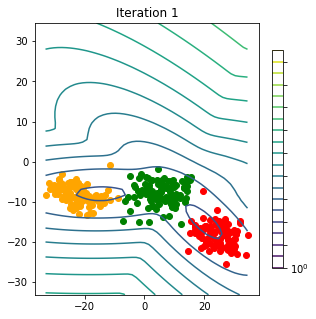

Iteration:2, Log Likelihood:-2034.0337739151541


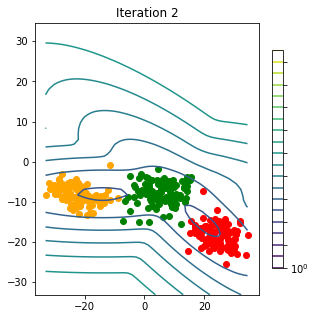

Iteration:3, Log Likelihood:-2033.7275206895383


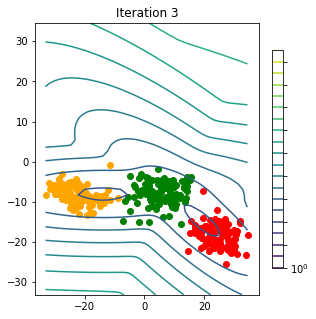

Iteration:4, Log Likelihood:-2033.6420419994352


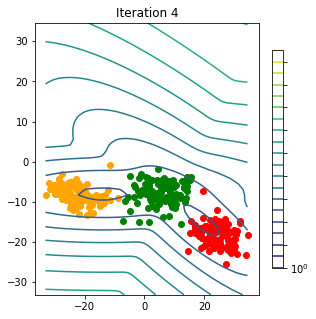

Iteration:5, Log Likelihood:-2033.5949129942217


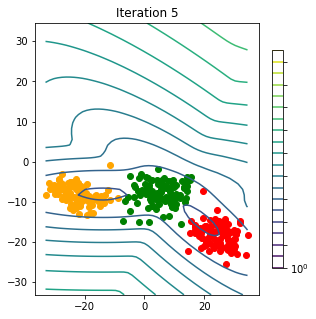

Iteration:6, Log Likelihood:-2033.5544380537763


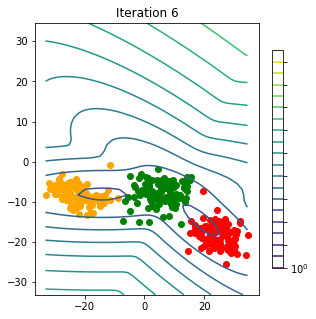

Iteration:7, Log Likelihood:-2033.5078673233977


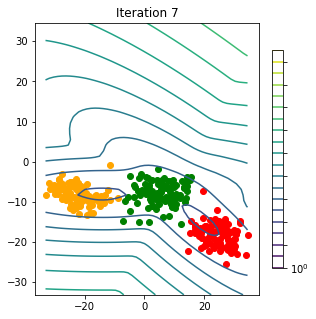

Iteration:8, Log Likelihood:-2033.4456329430245


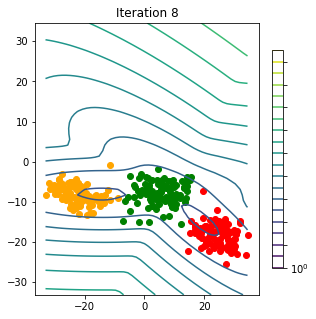

Iteration:9, Log Likelihood:-2033.3570277661586


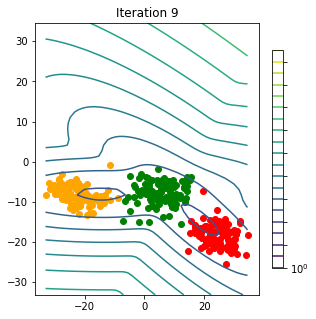

Iteration:10, Log Likelihood:-2033.2272803929284


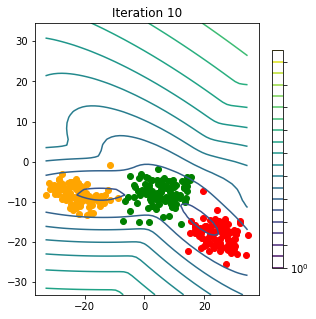

Iteration:11, Log Likelihood:-2033.0340545607223


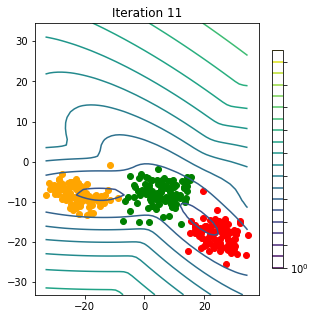

Iteration:12, Log Likelihood:-2032.7421002518408


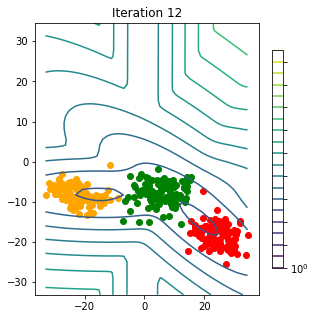

Iteration:13, Log Likelihood:-2032.2945081768903


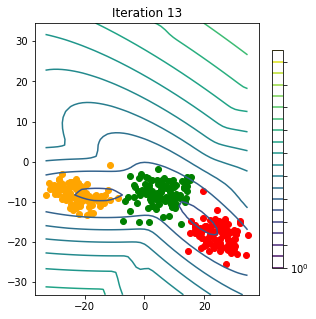

Iteration:14, Log Likelihood:-2031.5980288337328


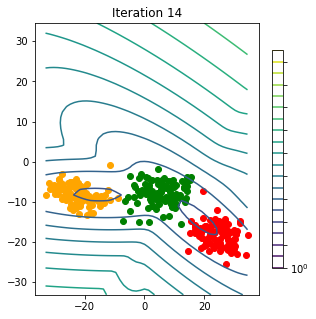

Iteration:15, Log Likelihood:-2030.4999315169835


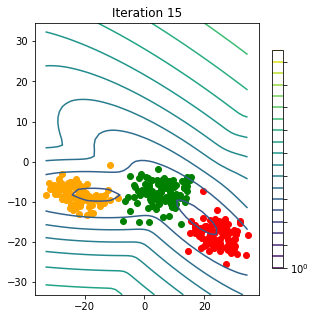

Iteration:16, Log Likelihood:-2028.749454588965


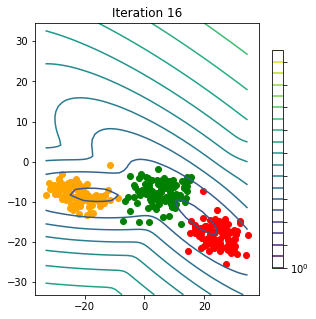

Iteration:17, Log Likelihood:-2022.3318753469416


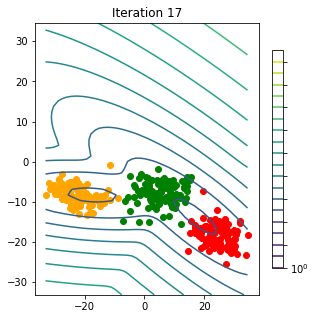

Iteration:18, Log Likelihood:-1997.9218793661912


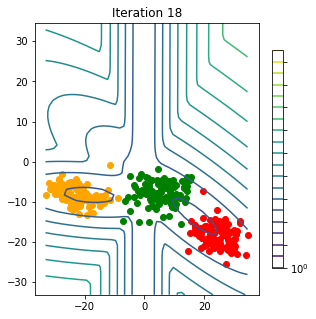

Iteration:19, Log Likelihood:-2002.13134684133


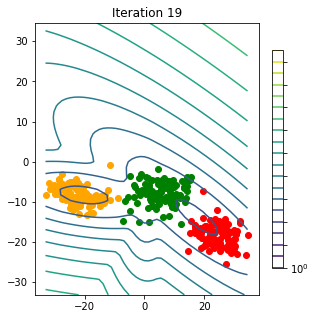

Iteration:20, Log Likelihood:-1988.7987721060824


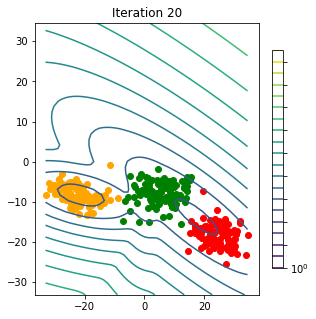

Iteration:21, Log Likelihood:-1983.9460707900869


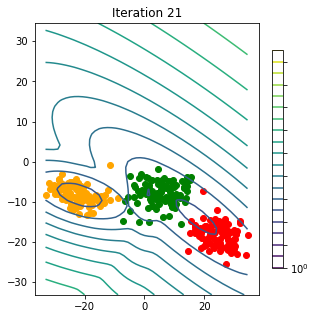

Iteration:22, Log Likelihood:-1980.8222445880917


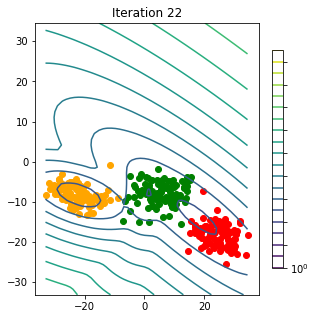

Iteration:23, Log Likelihood:-1977.8806668009986


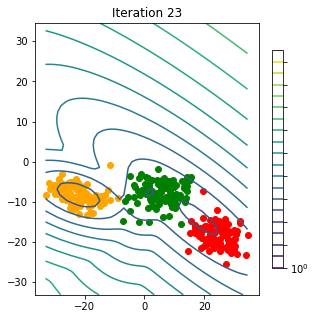

Iteration:24, Log Likelihood:-1975.2730331343507


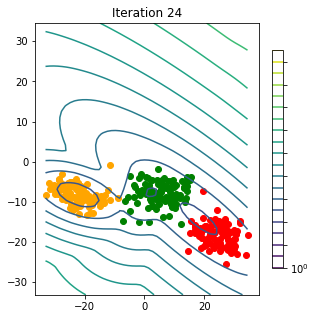

Iteration:25, Log Likelihood:-1972.9498430388194


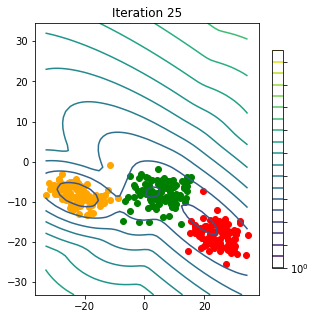

Iteration:26, Log Likelihood:-1970.7412781572439


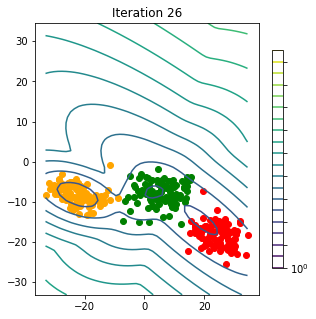

Iteration:27, Log Likelihood:-1968.3442408938622


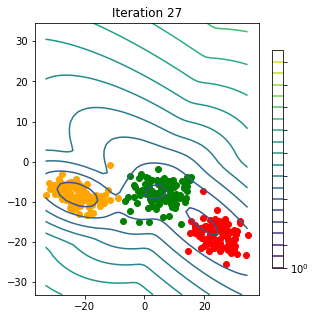

Iteration:28, Log Likelihood:-1965.549003917774


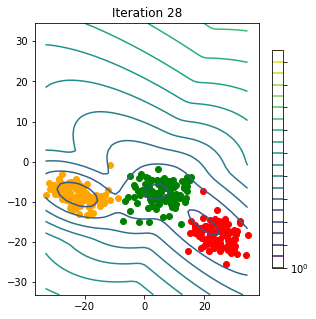

Iteration:29, Log Likelihood:-1962.4142454431346


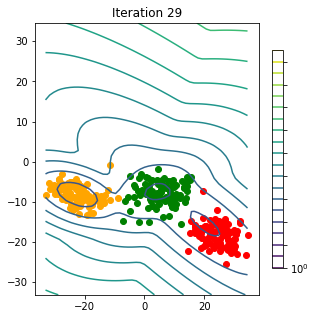

Iteration:30, Log Likelihood:-1959.2171298256078


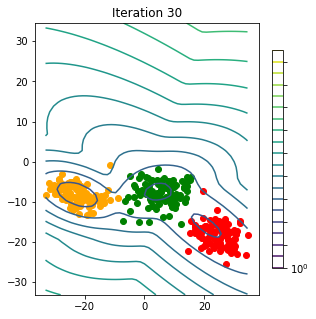

Iteration:31, Log Likelihood:-1955.9212170477492


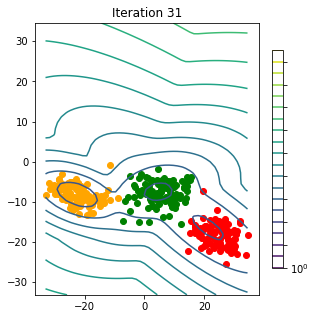

Iteration:32, Log Likelihood:-1951.4580403927619


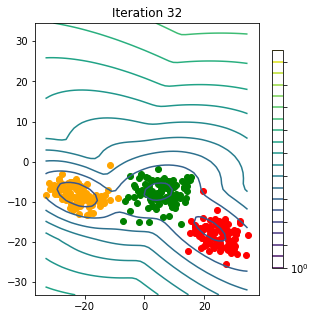

Iteration:33, Log Likelihood:-1942.6604282345647


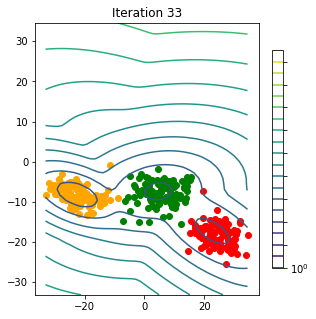

Iteration:34, Log Likelihood:-1930.892155047536


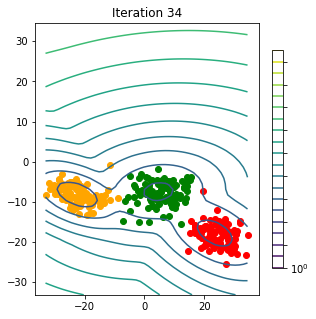

Iteration:35, Log Likelihood:-1922.2888499192268


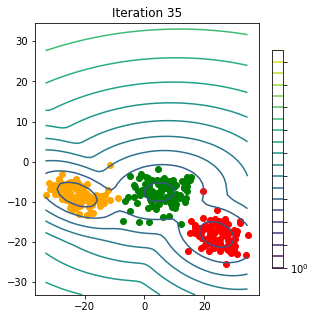

Iteration:36, Log Likelihood:-1920.913251982102


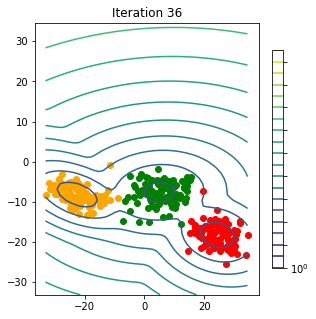

Iteration:37, Log Likelihood:-1920.8817556499757


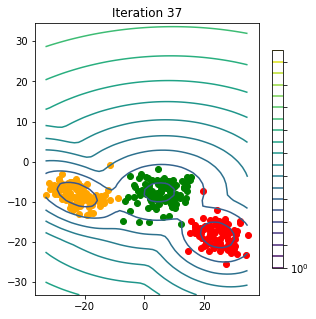

Iteration:38, Log Likelihood:-1920.88074636499


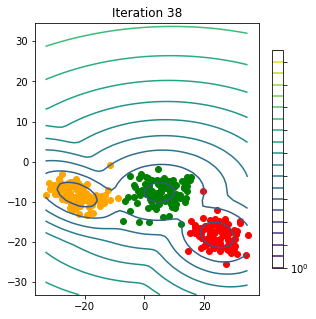

Iteration:39, Log Likelihood:-1920.8806885322483


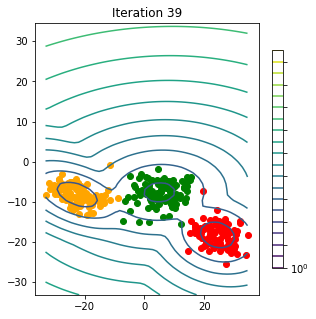

Converged after 39 iterations!


In [4]:
# Initialize the GMM Model and train with random initialization
gmm = GMM(data, 3)
gmm.train(mode='def')

Iteration:1, Log Likelihood:-1921.0754482707182


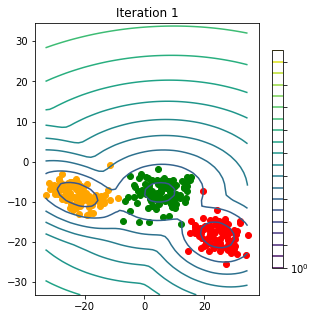

Iteration:2, Log Likelihood:-1920.904322162146


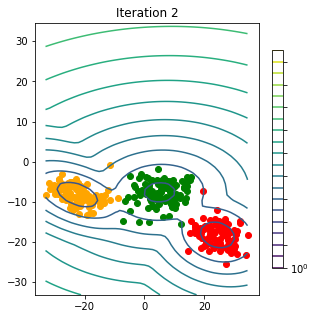

Iteration:3, Log Likelihood:-1920.8854040068422


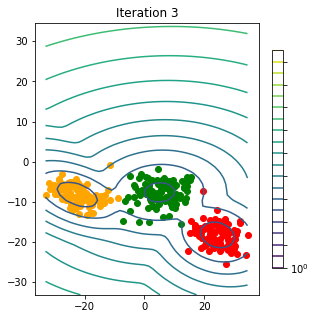

Iteration:4, Log Likelihood:-1920.881731518091


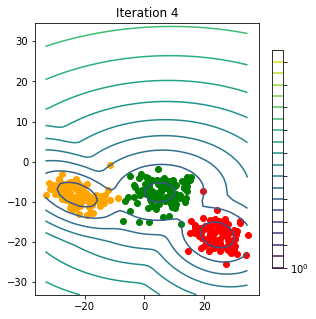

Iteration:5, Log Likelihood:-1920.8809181929473


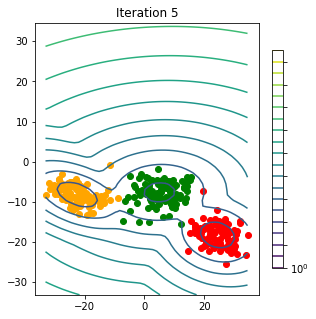

Iteration:6, Log Likelihood:-1920.8807340819828


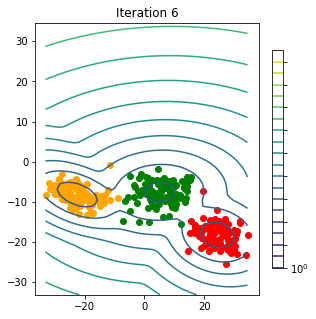

Iteration:7, Log Likelihood:-1920.880692361696


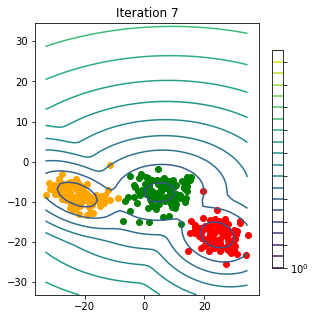

Converged after 7 iterations!


In [5]:
# Train with k-means initialization
gmm.train(mode='kmeans')

In [6]:
%%HTML
<video width="500" height="500" controls>
  <source src="Animated_Default_GMM.mp4" type="video/mp4">
</video>

Video("adgmm.mp4")

In [7]:
%%HTML
<video width="500" height="300" controls>
  <source src="Animated_Kmeans_GMM.mp4" type="video/mp4">
</video>

### 2.6 - Current Research

##### Image Modeling with Deep Convolutional Gaussian Mixture Models

Used for describing and generating images. Estimation and Sampling.  
- Multiple GMM layers linked by convolution and pooling operations. Exploits the same methodology of CNNs which gave them a performance boost. They do not model single input vectors, but the channel content at all positions h, w of the input A (L−1) n,w,h, using a shared set of parameters.
- Better than vanilla GMMs, because they do not require a prior K-means initialization, and it is infeasible in a layered structure. 
- Gradient-based technique for sampling through noninvertible operations like convolution and pooling. 
- Responsibilities of one GMM are passed as input to subsequent GMM. 


<img src="Output Pictures/dcgmm.jpg" width="700" height="700">


<img src="Output Pictures/opt.jpg" width="300" height="200">

<img src="Output Pictures/resp.jpg" width="300" height="200">

<img src="Output Pictures/sampling.jpg" width="700" height="700">

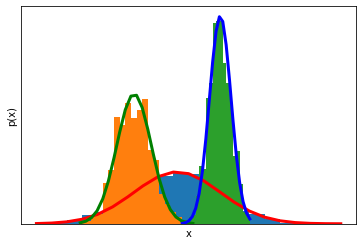

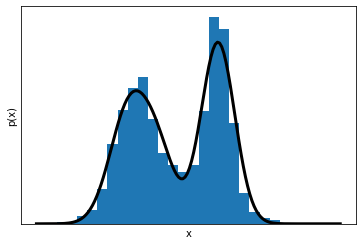

In [14]:
##### JUST ROUGH WORK, NOT A PART OF THE PRESENTATION, CODE USED TO GENERATE A FEW PLOTS #################
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

mu1, sigma1 = 0.5, 0.2 # mean and standard deviation
mu2, sigma2 = 0.3, 0.08 # mean and standard deviation
mu3, sigma3 = 0.7, 0.05 # mean and standard deviation
s1 = np.random.normal(mu1, sigma1, 1000)
s2 = np.random.normal(mu2, sigma2, 1000)
s3 = np.random.normal(mu3, sigma3, 1000)
count1, bins1, ignored1 = plt.hist(s1, 20, density=True)
count2, bins2, ignored2 = plt.hist(s2, 20, density=True)
count3, bins3, ignored3 = plt.hist(s3, 20, density=True)

plt.plot(bins1, 1/(sigma1 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins1 - mu1)**2 / (2 * sigma1**2) ),
         linewidth=3, color='r')
plt.plot(bins2, 1/(sigma2 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins2 - mu2)**2 / (2 * sigma2**2) ),
         linewidth=3, color='g')
plt.plot(bins3, 1/(sigma3 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins3 - mu3)**2 / (2 * sigma3**2) ),
         linewidth=3, color='b')
plt.xticks([], [])
plt.yticks([], [])
plt.xlabel('x')
plt.ylabel('p(x)')
plt.savefig('gaussianmixturecomps.png')
plt.show()

den = np.concatenate((s1,s2,s3))


K = 3
den = den.reshape((den.shape[0], 1))

def mix_pdf(x, loc, scale, weights):
    d = np.zeros_like(x)
    for mu, sigma, pi in zip(loc, scale, weights):
        d += pi * norm.pdf(x, loc=mu, scale=sigma)
    return d

mix = GaussianMixture(n_components=K, random_state=1, max_iter=100).fit(den)
pi, mu, sigma = mix.weights_.flatten(), mix.means_.flatten(), np.sqrt(mix.covariances_.flatten())

grid = np.arange(np.min(den), np.max(den), 0.01)

plt.hist(den, 30, density=True)
plt.plot(grid, mix_pdf(grid, mu, sigma, pi), c='black', linewidth=3)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('gaussianmixture.png')
plt.show()